In [ ]:
import cv2,os

categories=['with mask','without mask']
labels=[0,1]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [ ]:
#zip the folders containing the data, upload them in Colab, and then unzip.
!unzip 'with mask.zip'
!unzip 'without mask.zip'

In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path = category
    img_names = os.listdir(category)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
#data.shape
new_target.shape

(1376, 2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 45s 46ms/step - loss: 0.7086 - accuracy: 0.5556 - val_loss: 0.6415 - val_accuracy: 0.5444
Epoch 2/20
990/990 [==============================] - 44s 45ms/step - loss: 0.5698 - accuracy: 0.7000 - val_loss: 0.4825 - val_accuracy: 0.7581
Epoch 3/20
990/990 [==============================] - 44s 45ms/step - loss: 0.3160 - accuracy: 0.8717 - val_loss: 0.2803 - val_accuracy: 0.9113
Epoch 4/20
990/990 [==============================] - 44s 45ms/step - loss: 0.1968 - accuracy: 0.9242 - val_loss: 0.2501 - val_accuracy: 0.9234
Epoch 5/20
990/990 [==============================] - 44s 45ms/step - loss: 0.1391 - accuracy: 0.9404 - val_loss: 0.3206 - val_accuracy: 0.8548
Epoch 6/20
990/990 [==============================] - 45s 45ms/step - loss: 0.1082 - accuracy: 0.9586 - val_loss: 0.2044 - val_accuracy: 0.9113
Epoch 7/20
990/990 [==============================] - 44s 45ms/step - loss: 0.0673 - accur

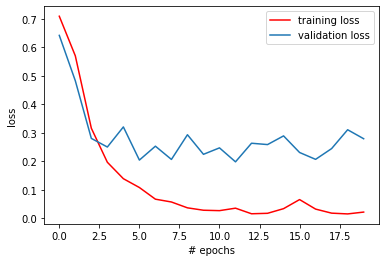

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

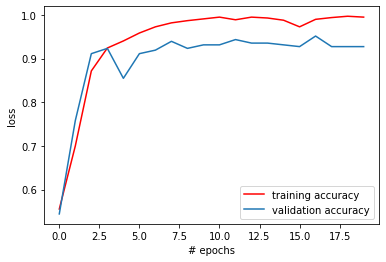

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 2s 12ms/step
[0.28678005731975037, 0.9420289993286133]


In [ ]:
from tensorflow.keras.models import load_model
# save entire model to HDF5 
model.save("network.h5")